# Q1 The MNIST data

It seems that no course on Machine Learning is complete, without training a network on the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits.  You can access them through `keras.datasets.mnist.load_data()`.

The tasks for the first assignment is therefore:

a) (2 marks) Reproduce the results of L03, but now use the original MNIST dataset.  Comment on your observations on the differences between the datasets.

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try
   - Change the number of nodes in the hidden layer
   - Use a different loss function
   - Use a different optimizer
   - change the number of epochs
   - change the batch size
   - play with a dropout layer
   - work with two hidden layers
   - work with three hidden layers
   
Explain the effect of changing parameters in your own words and draw conclusions about how performance improves.  The mark for this part will depend on the overall insight demonstrated.  Code alone does not yield marks. 
Note that one aspect of performance is required training time.  Do not use code cells which take longer than 10 minutes to run on standard CPU based hardware. (Also don't use code which exceeds standard memory requirements of about 8GB RAM, but that should not be an issure here)

In [1]:
# execute this cell before you start

import tensorflow as tf
import tensorflow.keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)

2024-05-17 07:17:53.550525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-17 07:17:53.550550: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


For this project, We will roughly follow the nice online tutorial at https://www.tensorflow.org/tutorials/keras/classification.

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The above cell accesses a data set `mnist`, which is a dataset of handwritten digits. After the above command, we have created four numpy arrays which contains the data. The data is split into training and testing data. The idea is that you train your network with the training data and then test if the training was successful with the testing data. Each data set consists of images and labels. Let us look more closely:

In [3]:
train_images.shape, type(train_images)

((60000, 28, 28), numpy.ndarray)

This means that we have 60000 images, and each image has 28x28 pixels. We can for example look at the first row of image number 200:

In [4]:
train_images[200][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [5]:
np.max(train_images[200])

255

We see that the data is of type `uint8`, which refers to 8 bits of unsigned integers. This means that each number is between 0 and 255. 

In order to see one of the figures, we use `plt.imshow` with a `binary` [colourmap](https://matplotlib.org/users/colormaps.html).

((60000, 28, 28), numpy.ndarray)

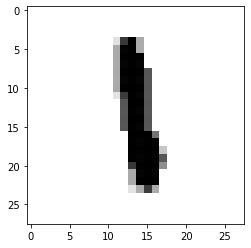

In [6]:
plt.imshow(train_images[200],cmap="binary")

train_images.shape, type(train_images)

By comparing with the first row, which we printed above, we see that values of `0` correspond to *white* pixels, and positive numbers correspond to grey/black pixels. 

Let us now look at the training labels:

In [7]:
train_labels.shape, type(train_labels)

((60000,), numpy.ndarray)

In [8]:
train_labels.dtype

dtype('uint8')

In [9]:
max(train_labels), train_labels[200]

(9, 1)

We see that there are 60000 training labels, one for each training image. The labels are just numbers from 0 to 9. Each number corresponds to specific Number (0 to 9).. In order to access them more conveniently, let us list them in a list:

In [10]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

class_names[1]

'1'

The `test_images` and `test_labels` are structured in a similar way, except that there are only 10000 of them:

In [11]:
test_images.shape

(10000, 28, 28)

## Normalize the input

In order to work with this data it is useful to first normalize the input to the interval between 0 and 1:

To normalize the data we divide the values by 255. This is because each pixel can be represented by a number between 0 and 255.

In [12]:
train_images = train_images / 255.0 #so that each values is  limited between 0 and 1

test_images = test_images / 255.0

Let us then have a look at the first couple of training images, to see if everything is correctly labelled:

Output a number of images to the screen in order to check that all training images have been correctly labelled.

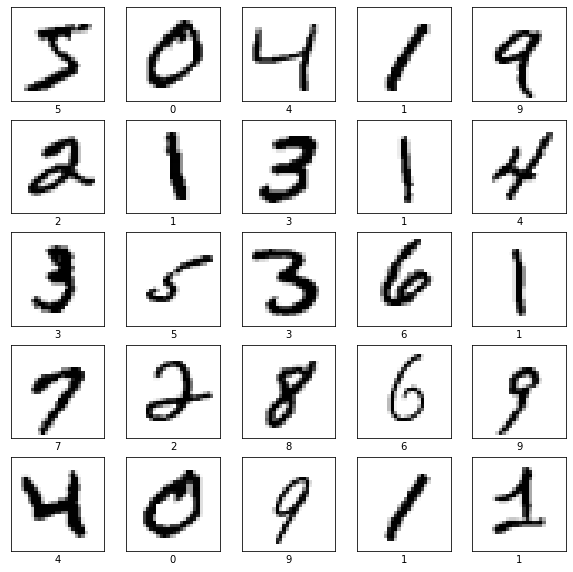

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Building the model

In order to build a network, which can be trained to recognize the images, we use the [Keras](https://tf.keras.io/) framework. Keras is a high-level interface to describe Neural Networks. Tensorflow comes with one implementation of Keras, which we will use here. 

The first task is to build a model, which organizes the different layers of our network. In our case the layers will be sequentially stacked, and we use `tf.keras.Sequential`:

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

2024-05-17 07:17:57.876246: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-17 07:17:57.876279: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-17 07:17:57.876305: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (patrick-OptiPlex-7020): /proc/driver/nvidia/version does not exist
2024-05-17 07:17:57.876542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Some notes on the above:
- 28 x 28 pixels are flattened in one vector of size 784 x 1
- A dense layer with 128 outputs. 
- relu - if input is below zero make it zero otherwise do nothing
- whether input responds to one of the numbers assigned to class names

The output shape of the flatten layer is (None, 784), where none refers to arbitary unspecified dimensions. There are no parameters to train in this flatten layer.

In our first dense layer, we specife 128 nodes and therefore the output shape is (None, 128) the number of parameters are the weights connecting the 784 outputs of the previous layers with the 128 inputs of the current layer.

Here `Flatten()` defines the inpout layer and specifies that the 28x28 input from each image shall be processed as 784 individual channels henceforth. `Dense()` define layers of neurons in the network with the given activation function. Dense refers to the fact that each neuron will be coupled to all outputs of the preceeding layer. The last layer has 10 nodes, which are the output nodes. This is a *softmax* layer, which is explained in the next cell. An overview of other layers can be found [here](https://tf.keras.io/api/layers/core_layers/).

We can get an overview of the model using the following formula 'model.summary()'


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The output shape of the flatten layer is (None, 784), where none refers to arbitary unspecified dimensions. There are 0 parameters to train in this flatten layer.

In our first dense layer, we specify 128 nodes and therefore the output shape is (None, 128) the number of parameters are the weights connecting the 784 outputs of the previous layers 
with the 128 inputs of the current layer. Each of 128 nodes has one bias parameter. 
The final number of parameters can be calculated as follows:
    (784 + 1) x 128 = 100,480

#The final layer is calculated in a similar fashion, we specify 10 nodes and therefore its output is (None,10). The number of parameters are the weights connecting the 128 outputs of the previous layerwith the 10 inputs of the current layer. Each of the 10 nodes has one bias parameter.The final number of parameters can be calculated as follows:
    (128 + 1) x 10 = 1,290

Total params figure is the addition of all parameters in each layer:
   0 + 100,480 + 1,290 = 101,770

## Compiling the model

Here we specify our choosen optimzer and our loss function in order to complie the model.

In this case we are choosing to use the adam optimizer, which is an extension of stochastic gradient decent. An optimiser will modify attributes of a neural network (i.e weights and leanring rates)

Some of adams benefits include:
- Little memory requirement
- Is optimal for issues that have a large amount of parameters (or data)

The loss function is a method of meassuring how well the choosen algorithm models the dataset
In this case the sparse categorical crossentropy loss function was picked. This function comuptes the cross-entropy loss between true labels and predictied labels. This function is ideal for multi-classifcation applications as is required as we have 10 categorys from 0 to 9.

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Network

Finally we are now in a position to train our network. This is done through the fit() method:

We feed our model network the training data. The number of epochs refers to the number of times the computer sees the training data. In this scenario we are letting the computer is the data 5 times.

n other useful parameters to play is batch_size, which indicates the number of images per gradient update. If you do not specify batch_size the default of 32 is used. 

In [17]:
model.fit(train_images, train_labels, epochs=3, batch_size=128) 

Epoch 1/3


2024-05-17 07:17:58.181901: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 4ms/step - loss: 0.3636 - accuracy: 0.8981
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.1625 - accuracy: 0.9538
Epoch 3/3
469/469 [==============================] - 2s 4ms/step - loss: 0.1160 - accuracy: 0.9670


## Evaluating test data using the trained network

The member function `evaluate` is used to apply the trained network to all the *testing data* and calculate the accuracy of the predictions. 

In [18]:
test_images.shape, type(test_images.shape)

((10000, 28, 28), tuple)

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

2024-05-17 07:18:04.394032: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.1111 - accuracy: 0.9676
Test accuracy: 0.9675999879837036


Internally, `evaluate` uses `predict` to calculate the output vector for all testing data, and then checks, which of the outputs is the largest one. This is then compared with the correct label.  We can also do this by hand:

In [20]:
predictions = model.predict(test_images)

 58/313 [====>.........................] - ETA: 0s

2024-05-17 07:18:05.323421: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


For example for test timage number 200 we find the following prediction:


In [21]:
predictions[200], sum(predictions[200])

(array([3.8469120e-06, 4.7532151e-08, 1.5148594e-03, 9.9467260e-01,
        3.3022782e-09, 2.3518202e-03, 3.3572578e-09, 1.3066463e-09,
        1.4566260e-03, 4.3769131e-08], dtype=float32),
 0.9999998482437427)

We can now see what the prediction vector looks like for number 200 of the test images each of 10 entrys represent the probabily that the image represents a particular number 0 to 9. In our example the largest number is the 4th entry in the vector which correspondes with the class name '3'.

In [22]:
np.argmax(predictions[200]), class_names[np.argmax(predictions[200])]

(3, '3')

We can check the image and true label for this case and indeed confirm that we have a figure '3':

(<matplotlib.image.AxesImage at 0x7ff8b70f18b0>, '3')

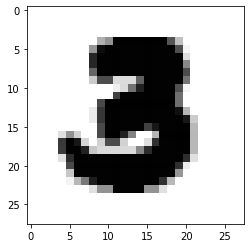

In [23]:
plt.imshow(test_images[200],cmap="binary"), class_names[test_labels[200]]

In this case, our classification has clearly worked. Given we have a model accurary 0.97 there are sceanrios where classifcation fails.

In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

To demonstrtate, what they do, let us test it with the trousers:

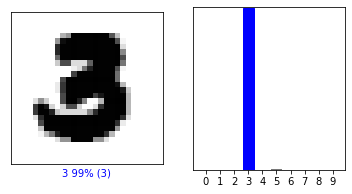

In [25]:
i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

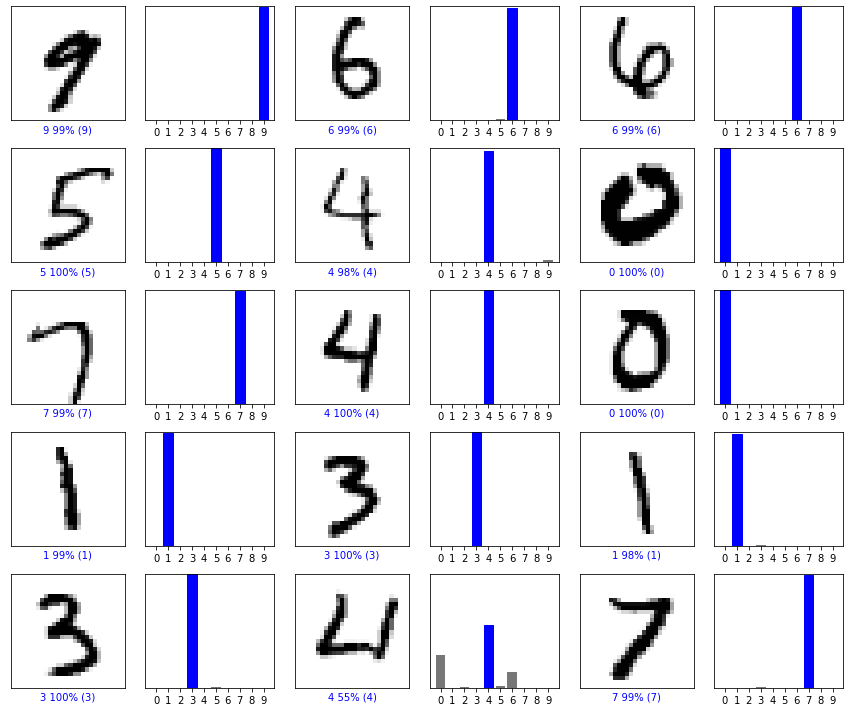

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

offset=20
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+offset, predictions[i+offset], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+offset, predictions[i+offset], test_labels)
plt.tight_layout()
plt.show()

As we can see, of the 15 test data entries we sampled, The model has correctly labels all 15 correctly. In the majority of cases the model is 100% sure that it has labelled what it is reading in correctly. A few interesting points of note would be the 4 ( the 14th entry). The model is not as sure that what it looking at is a 4. This is a remarkably good accuracy but it's interesting to note that is also thinks theres a possiblity it could be 0 or 6.

Difference between the MNIST anf Fashion_MNIST datasets:
   - The test accuracy for MNIST is greater than Fashion_MNIST. This is due to the fact that the dataset Fashion_MNIST is a more challenging replacement. This is clear from observing samples of both datasets. In MNIST there is a very clear difference between the background (white) and the number (in black). The transition from white to black is also very immdiate. Where as with the Fashion_MNIST dataset the greyscaled images pick up light coloured materials as grey or even white.
   - It's also harder to distinguish some of the items in Fashion_MNIST. For example some dresses look like tops, coats look like dresses and visa versa. IN the case of footwear the silohettes of a sneaker can be mistaken for a ankle boot. In the MNIST data set we just have the digits 0 to 9 which be design are meant to look as different as possible from one another.

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try

    Change the number of nodes in the hidden layer

## Changing the number of nodes in the hidden layer

As an example, we changed the number of nodes in the hidden layer in order to observe its effect on the Test accuracy. The number of nodes were changed from the original 128 to 32.

It was noted that the test accuracy suffers as a result of the reduction in nodes.

In general, it is cosidered that the optimal size of the hidden layer is usually between the size of the input and the size of the output layer. i.e. the number of nuerons in that layer is the mean of the neurons in the input and ouput layers.

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try
   
   - change the number of epochs


As an example, we changed the number of epcohs,  to observe its effect on the Test accuracy. The number of nodes were changed from the original 3 to 1.

The reduction of epochs definitely reduces the test accuracy. 

In general, when it comes to deciding on the optimal number of epoch to train a neural network one must be concious of overfitting the data. When the number of epochs used to train a neural network is more than necesscary, the training model learns pattern in the data that specific to the datset.

How we can observed overfitting in our models, a good way to observe overfitting is by looking at the loss values. Training should come to a halt if your loss values increase.

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try

   - change the batch size

# Batch Size

As an example, we changed the batch size when fitting the data to the model,  to observe its effect on the Test accuracy. The batch size as changed from the original 32 (default) to 8.

It was noted that the test accuracy was so high initially that it's diffcult to note any improvement. But in this case a large batch size seems to reduce model accuracy. In comparison, I also looked at abatch size of 128 which compariably has a better test accuracy.

The batch size is the number of samples passed to the network at each traing step. the larger the batch size the the smaller the step size. The larger the batch size the faster the it takes for the model to complie.

In this sceanrio, seeing as it only take a low amount of epochs to train a model with a suitable accurcary we can aford to train a model with a lower batch size.

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try

   - Use a different optimizer


# Choice of Optimizers

In the example carried out above, we have looked at a number of different optimizers and apply it to this dataset.

The optimizer that I have examined are adam, RMSprop and SGD (Gradient decent).

An optimizer is define in model.complie. an optimizer updates a model in reposnse the the output of the loss function. They assist in minimizing the loss function.

Gradient decent is a way of finding the corresponding weight for the minumum loss. (Test Accuracy Value = 0.0844)

RMSprop (Root mean squared Propagation) is an extension of gradiant decent (Test Accuracy Value = 0.6365). The optimizer uses a decaying averge of partial gradients in the adaption of the step size for each parameter. A benefit of using decaying moving average allows the algorithm to forget the earliest gradients it observed and and only focus on the most recent observed partial gradient seen durong the progress of the search.

ADAM (Test Accuracy Value = 0.5645) is also an extension of stochastic gradient decent. Adam calculates the exponential moving average of the gradient and the squared gradient. THe parameters beta 1 and beta 2 control the decay rates of these moving averages.

c) (3 marks) Write your student number on paper and take a photo. How well are the individual digits recognized? (Hint: you need to convert the photo first into the desired format, and there are many ways to do this.  You are expected 
to read up on a suitable way yourself, and describe how you did it.)

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt

# We will need to use the library Open cv for this part of the assignment 
# in order to read in the 9 images of my student number

I will carry out the reading in process for 1 image in this part, just to explain the process and why we are doing what we are doing.

Firstly, Load in the sample image. Assign the variable file the filepath of the selected image.

We then use the function imread to read in the image in greyscale using IMREAD_GRAYSCALE because that's is what we want to match the MNIST training data

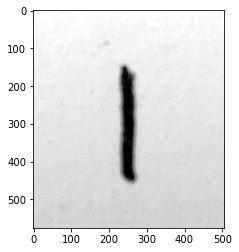

In [28]:
file = r'No '+str(1)+'.jpg'
test_image = cv.imread(file, cv.IMREAD_GRAYSCALE)

#Preview sample image
plt.imshow(test_image,cmap = 'gray')

There are two main differences between what I have above and the MNIST data:

- 1: the MNIST data are size 28 x 28 and our images need to be that same size because the neural network is complied and trained on the basis of inputs being 28 x 28 array

- 2: Resize image and define an interpolation parameter which can be described as math it uses to resize the image. In this case, the default interpolation parameter will be used. You could try other interpolation parameters and see if the nueral network happens to be more accurate with one interpolation method over another.
 

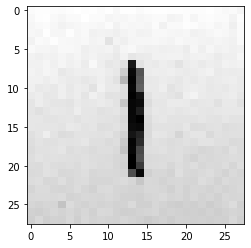

In [29]:
img_resized = cv.resize(test_image, (28,28), interpolation = cv.INTER_LINEAR)
plt.imshow(img_resized,cmap = 'gray')

We then normalise the Input. 

In [30]:
img_resized = img_resized / 255.0 #so that each values is limited between 0 and 1

In [31]:
img_resized[12]

array([0.89803922, 0.92941176, 0.90980392, 0.89803922, 0.89803922,
       0.89411765, 0.91764706, 0.90588235, 0.90980392, 0.92156863,
       0.90980392, 0.89019608, 0.78039216, 0.02745098, 0.04313725,
       0.8627451 , 0.90196078, 0.90196078, 0.92156863, 0.92156863,
       0.91764706, 0.89803922, 0.90588235, 0.90980392, 0.88235294,
       0.91372549, 0.91372549, 0.88627451])

We can see that the values at each element do not behave as the model would expect. ie. white is supposed to be represented by zero and black is to be represented by onethis is inverted in the case above.


We must now look at how to invert an image so that it can be changed from a digit that is black with a white background to a digit that is white with a black background.

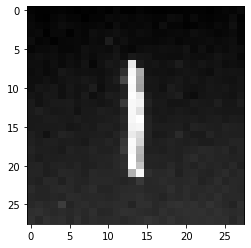

In [32]:
img_resized_invert = 1 - img_resized

plt.imshow(img_resized_invert,cmap = 'gray')

#alternative opencv method to invert and image, which did not work in this case.
#img_resized_invert = cv.bitwise_not(img_resized)

In [33]:
img_resized_invert[12]

array([0.10196078, 0.07058824, 0.09019608, 0.10196078, 0.10196078,
       0.10588235, 0.08235294, 0.09411765, 0.09019608, 0.07843137,
       0.09019608, 0.10980392, 0.21960784, 0.97254902, 0.95686275,
       0.1372549 , 0.09803922, 0.09803922, 0.07843137, 0.07843137,
       0.08235294, 0.10196078, 0.09411765, 0.09019608, 0.11764706,
       0.08627451, 0.08627451, 0.11372549])

We can now see that our white space values are closer to 0 and or black space values are closer to 1.

The image is now in a suitable condition for the model to assess it. 
I've used a for loop to do the process explained above for all 9 images.

## 1(c) for Entire Student Number

((9, 28, 28), tuple)

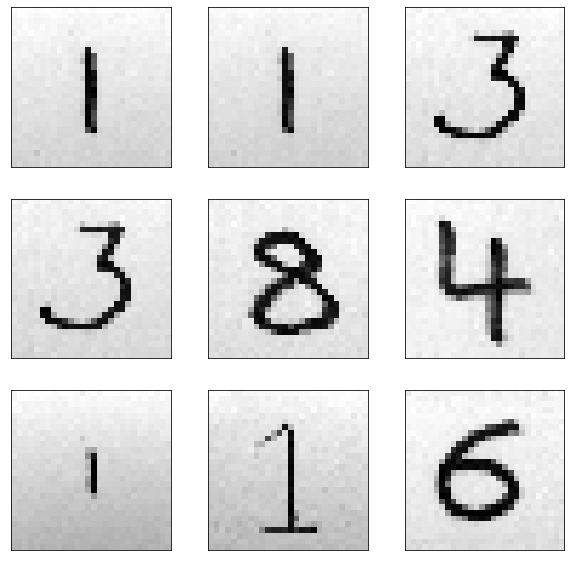

In [35]:
import cv2 as cv
import matplotlib.pyplot as plt

images=[] #Create list to store images

for i in range(1,10):
    
        #imagepath = r'/home/patrick/Documents/AM6016/Assignments/Student number images/Edited/No '+str(i)+'.jpg'
        imagepath = r'No '+str(i)+'.jpg'
        img=cv.imread(str(imagepath),cv.IMREAD_GRAYSCALE)                       
        img=cv.resize(img,(28,28))
        img= img / 255.0
        img= 1 - img
        images.append(img)    

#Plot resized and inverted images to the screen

plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    
#convert list into an array
id_images = np.array(images)

#Set a tolerance on the images: Any pixels with a value of less than 0.37 set to zero.(ie. whitespace)
id_images[id_images < 0.37]=0

#create an array of the correct labels for the numbers
id_labels = np.array([1,1,3,3,8,4,1,1,6])

#print array shape and type
id_images.shape, type(id_images.shape)

In [36]:
#Evaulating the student number photos data using the trained network

test_loss, test_acc = model.evaluate(id_images, id_labels)

print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 122ms/step - loss: 1.4151 - accuracy: 0.7778
Test accuracy: 0.7777777910232544


In [37]:
# Use model.predict to claculate the output vector for the id data
# and then checkts which of the oupts is the largest one

predictions = model.predict(id_images)

1/1 [==============================] - 0s 17ms/step


In [38]:
predictions[1], sum(predictions[1]), np.argmax(predictions[4])

(array([7.6475669e-07, 2.8685833e-04, 9.3272913e-01, 5.9911124e-02,
        3.0622640e-08, 6.5351948e-03, 1.3424446e-06, 2.5358217e-04,
        1.8773487e-04, 9.4369316e-05], dtype=float32),
 1.0000001267492955,
 8)

Use Plot_image functions from the online tutorials to explore when the function fails/succeed

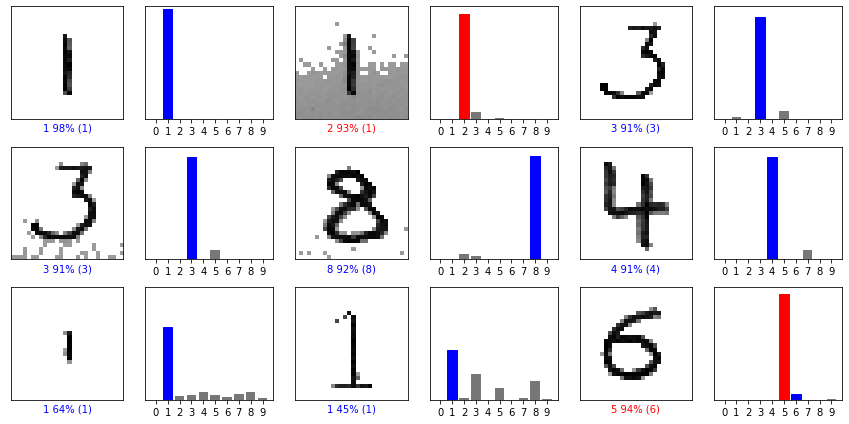

In [40]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

offset=0
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+offset, predictions[i+offset], id_labels, id_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+offset, predictions[i+offset], id_labels)
plt.tight_layout()
plt.show()

## The Effect of the Input the Machine is fed

Looking at  the first pair of ones in my student number. 
The first 1, is correctly identified as the number 1. This image was treated before feeding it to the computer. It's contrast was adjusted making it very clear what is black and what is white.

The second 1, is incorrectly identified as the number 2. This image was fed to the computer untreated for contrast as a result we can see that for the pixels at the lower part of the image the computer is having difficulty determining whether each pixel is white or black. 

If we now turn our attention to the number 1 at position 6 (of 0 to 8) in my student number, we can see i've written 1 differently hear. In this case, is a lot smaller here. it is correctly identified as the number 1 but in this case the computer is not as sure and has also itenfied traits of all other possible figures baring 0.